In [54]:
import pandas as pd
import seaborn as sns
import json
import numpy as np
import scipy as sp

In [28]:
with open('results.json', 'r') as f:
    json_data = json.load(f)
json_data[0]

{'reaction_time': [279.5,
  353.30000000074506,
  343.90000000037253,
  1361.4000000003725,
  380.2000000011176,
  244.80000000074506,
  301.40000000037253,
  322,
  297.69999999925494,
  325,
  303.19999999925494,
  285.8999999985099,
  91.30000000074506,
  306.30000000074506,
  275.19999999925494],
 'emotion': 'sad',
 'survey': {'firstName': 'Lina',
  'age': '21',
  'moodBefore': '67',
  'sexe': 'Femme',
  'moodAfter': '55'},
 'id': '1'}

In [65]:
df = pd.DataFrame(columns=[])
firstName, age, sexe, emotion,moodBefore, moodAfter, reaction_time, mean = [], [], [], [], [], [], [], []
for person in json_data:
    age_person = person["survey"]["age"]
    if age_person == 0:
        age_person = np.nan
    firstName.append(person["survey"]["firstName"])
    age.append(age_person)
    sexe.append(person["survey"]["sexe"])
    emotion.append(person["emotion"])
    moodBefore.append(person["survey"]["moodBefore"])
    moodAfter.append(person["survey"]["moodAfter"])
    reaction_time.append(np.array(person['reaction_time']))
    mean.append(np.mean(person['reaction_time']))
df = pd.DataFrame({
    "firstName": firstName,
    "age": age,
    "sexe": sexe,
    "emotion": emotion,
    "moodBefore": moodBefore,
    "moodAfter": moodAfter,
    "rt": reaction_time,
    "mean" : mean
})
df = df.drop(1)
df

,firstName,age,sexe,emotion,moodBefore,moodAfter,rt,mean
0,Lina,21,Femme,sad,67,55,"[279.5, 353.30000000074506, 343.90000000037253...",364.740000
2,Océane,21,Femme,sad,55,54,"[329.2000000476837, 288.2000000476837, 288.5, ...",290.980000
3,Agnes,23,Femme,neutral,35,84,"[386.7999999523163, 361.0, 365.7999999523163, ...",408.080000
4,Augustin,21,Homme,sad,32,52,"[344.0, 383.0, 370.0000000000582, 375.0, 412.0...",421.133333
5,Houssam,24,Homme,sad,67,66,"[408.80000001192093, 354.5, 351.5, 356.1999999...",370.713333
6,Kaëlig,20,Homme,sad,63,63,"[344.30000001192093, 352.80000001192093, 305.2...",359.140000
7,Emile,21,Homme,sad,67,54,"[411.0000000000291, 379.0, 340.9999999999709, ...",369.466667
8,Maeva,20,Femme,sad,77,53,"[328, 341, 311, 323, 422, 313, 299, 314, 337, ...",322.600000
9,Aksell,21,Femme,neutral,78,64,"[437, 374, 392, 364, 374, 360, 385, 393, 359, ...",383.200000
10,Antoine,20,Homme,neutral,24,23,"[737.9000000953674, 345.40000009536743, 349.5,...",382.333333


<AxesSubplot:xlabel='emotion', ylabel='mean'>

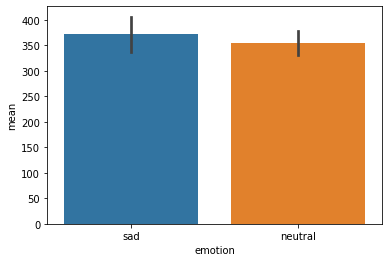

In [66]:
test = df[["emotion", "mean"]]
sns.barplot(x=df['emotion'], y=df['mean'])

In [67]:
sp.stats.ttest_ind(test[test["emotion"]=="sad"]["mean"], test[test["emotion"]!="sad"]["mean"])
# sp.stats.ks_2samp(test[test["emotion"]=="sad"]["mean"], test[test["emotion"]!="sad"]["mean"])

Ttest_indResult(statistic=0.7113954314104559, pvalue=0.485957086073065)